In [8]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Ensure inline plotting
%matplotlib inline

In [9]:
# Load the datasets
hiv_aids_df = pd.read_csv(r'C:\Users\dell\Desktop\MyDocs\Docs\MK\hivaids-deaths-and-averted-due-to-art.csv')
aid_given_df = pd.read_csv(r'C:\Users\dell\Desktop\MyDocs\Docs\MK\foreign-aid-given-net.csv')
aid_received_df = pd.read_csv(r'C:\Users\dell\Desktop\MyDocs\Docs\MK\foreign-aid-received-net.csv')

# Display the first few rows of each dataset
hiv_aids_df.head(), aid_given_df.head(), aid_received_df.head()

(        Entity Code  Year  \
 0  Afghanistan  AFG  1990   
 1  Afghanistan  AFG  1991   
 2  Afghanistan  AFG  1992   
 3  Afghanistan  AFG  1993   
 4  Afghanistan  AFG  1994   
 
    Deaths averted due to antiretroviral therapy - Disaggregation: estimate  \
 0                                                0.0                         
 1                                                0.0                         
 2                                                0.0                         
 3                                                0.0                         
 4                                                0.0                         
 
    AIDS-related deaths - Disaggregation: All ages estimate  
 0                                               33.0        
 1                                               43.0        
 2                                               57.0        
 3                                               74.0        
 4                              

In [10]:
# Check for missing values
hiv_aids_df.isnull().sum(), aid_given_df.isnull().sum(), aid_received_df.isnull().sum()

# Drop unnecessary columns
hiv_aids_df.drop(columns=['Code'], inplace=True)
aid_given_df.drop(columns=['Code', '990658-annotations'], inplace=True)
aid_received_df.drop(columns=['Code', '989626-annotations'], inplace=True)

# Fill missing values with 0 for deaths averted and AIDS-related deaths
hiv_aids_df.fillna(0, inplace=True)

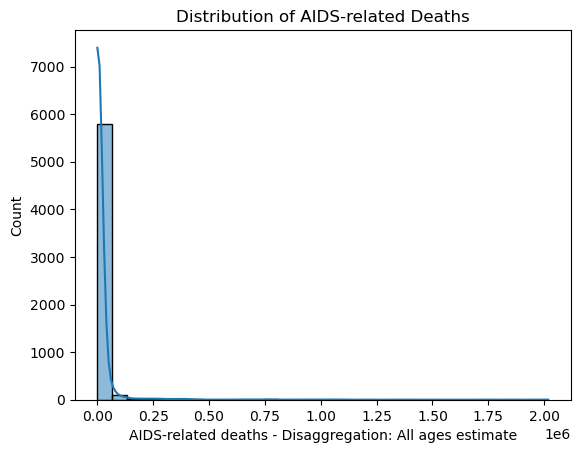

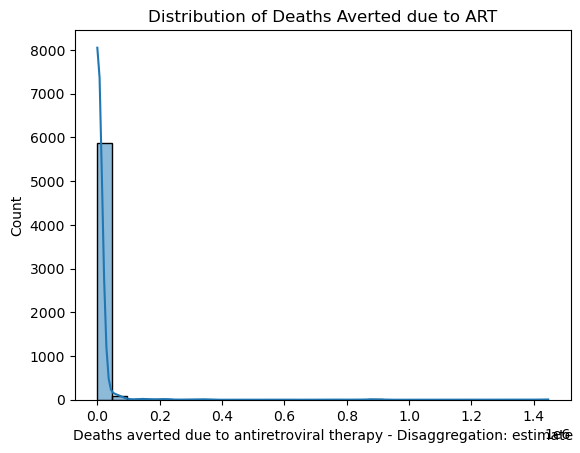

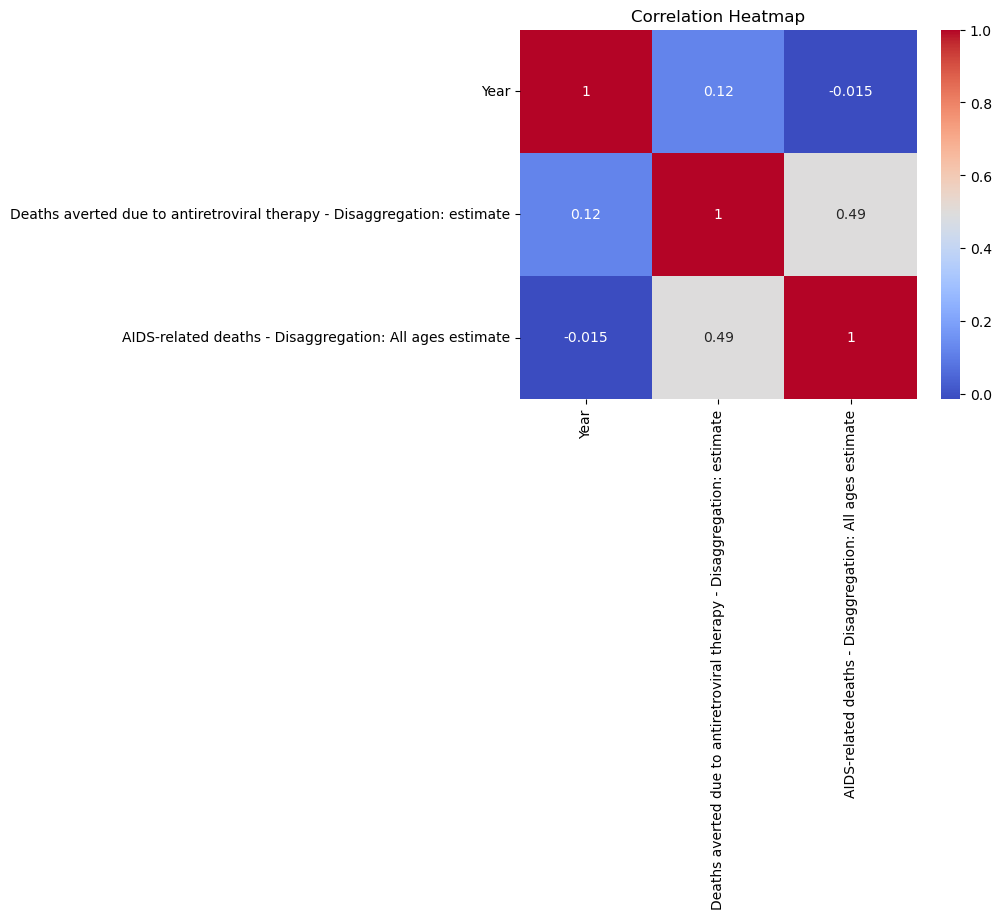

In [11]:
# Plot the distribution of AIDS-related deaths
sns.histplot(hiv_aids_df['AIDS-related deaths - Disaggregation: All ages estimate'], bins=30, kde=True)
plt.title('Distribution of AIDS-related Deaths')
plt.show()

# Plot the distribution of deaths averted due to ART
sns.histplot(hiv_aids_df['Deaths averted due to antiretroviral therapy - Disaggregation: estimate'], bins=30, kde=True)
plt.title('Distribution of Deaths Averted due to ART')
plt.show()

# Correlation heatmap for numeric columns in hiv_aids_df
numeric_df = hiv_aids_df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [12]:
# Merge datasets on Entity and Year
merged_df = pd.merge(hiv_aids_df, aid_given_df, on=['Entity', 'Year'], how='inner')
merged_df = pd.merge(merged_df, aid_received_df, on=['Entity', 'Year'], how='inner')

# Define features and target variable
X = merged_df[['Official development assistance (ODA) and private grants by donor - Net disbursements',
               'Official development assistance (ODA) by recipient (Official donors)']]
y = merged_df['AIDS-related deaths - Disaggregation: All ages estimate']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mse, r2

(103666771.69538683, 0.16888545594087878)